In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df= pd.read_csv("hitters.csv")
df= df.dropna()
dms= pd.get_dummies(df[["League","Division","NewLeague"]])
y= df['Salary']
x_= df.drop(['Salary','League','Division','NewLeague'],axis= 1).astype('float64')
x= pd.concat([x_, dms[['League_N','Division_W','NewLeague_N']]],axis= 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                   random_state=42)

In [3]:
rf_model= RandomForestRegressor(random_state= 42).fit(x_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

In [5]:
y_pred= rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

# Model Tuning

In [6]:
rf_params= {"max_depth": range(1,10),
           "max_features": [1,2,5,10],
           "n_estimators": [200,500,1000,2000]}

In [7]:
rf_cv_model= GridSearchCV(rf_model ,rf_params, cv= 10, n_jobs= -1, verbose= 2).fit(x_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [8]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 2, 'n_estimators': 200}

In [12]:
rf_model= RandomForestRegressor(random_state= 42, max_depth= 8,
                               max_features= 2,
                                n_estimators= 200)
rf_tuned= rf_model.fit(x_train, y_train)

In [13]:
y_pred= rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

[CV] END ......max_depth=1, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=1, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=1, n_estimators=1000; total time=   0.6s
[CV] END .....max_depth=1, max_features=1, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=1, n_estimators=2000; total time=   1.5s
[CV] END ......max_depth=1, max_features=2, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=2, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=2, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=2, n_estimators=2000; total time=   1.3s
[CV] END ......max_depth=1, max_features=5, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=5, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=5, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, m

[CV] END ......max_depth=1, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=1, n_estimators=500; total time=   0.3s
[CV] END ......max_depth=1, max_features=1, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=1, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=1, n_estimators=2000; total time=   1.3s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=500; total time=   0.4s
[CV] END ......max_depth=1, max_features=2, n_estimators=500; total time=   0.4s
[CV] END .....max_depth=1, max_features=2, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=2, n_estimators=2000; total time=   1.4s
[CV] END ......max_depth=1, 

[CV] END ......max_depth=1, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=1, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=1, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=1, n_estimators=2000; total time=   1.3s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=2, n_estimators=500; total time=   0.3s
[CV] END ......max_depth=1, max_features=2, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=2, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=2, n_estimators=2000; total time=   1.4s
[CV] END ......max_depth=1, 

[CV] END ......max_depth=1, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=1, n_estimators=500; total time=   0.3s
[CV] END .....max_depth=1, max_features=1, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=1, n_estimators=2000; total time=   1.3s
[CV] END .....max_depth=1, max_features=1, n_estimators=2000; total time=   1.3s
[CV] END .....max_depth=1, max_features=2, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, max_features=2, n_estimators=2000; total time=   1.4s
[CV] END ......max_depth=1, max_features=5, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=5, n_estimators=200; total time=   0.2s
[CV] END ......max_depth=1, max_features=5, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=1, max_features=5, n_estimators=500; total time=   0.4s
[CV] END .....max_depth=1, max_features=5, n_estimators=1000; total time=   0.7s
[CV] END .....max_depth=1, m

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

In [15]:
rf_tuned.feature_importances_

array([0.05815483, 0.06385047, 0.03526306, 0.04181864, 0.04681219,
       0.04922912, 0.07383884, 0.09729407, 0.08687369, 0.07891305,
       0.08781579, 0.08308623, 0.09694315, 0.04711319, 0.02041144,
       0.01838781, 0.00384698, 0.00554858, 0.00479886])

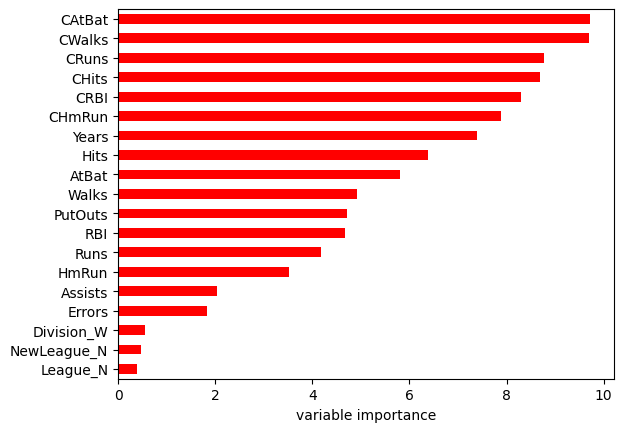

In [16]:
Importance= pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                        index= x_train.columns)
Importance.sort_values(by= 'Importance',
                      axis= 0,
                      ascending= True).plot(kind= "barh",
                                           color= 'r')
plt.xlabel('variable importance')
plt.gca().legend_= None